# Non-Personal Recommendation Techniques

- We don't always know our user's preferences, e.g. new users
- We can user patterns from the populations behavior to make suggestions
- In many examples, no machine learning is required

## Popularity Ranking

- other people really liked it, so you probably will too

### Challenges

- McDonald's is popular, should we recommend that? Probably not
- top 40 music is popular, but many people won't like it
- age can be an important factor to consider, we should usually consider this
- news from last week is popular, but we don't want to see old news

## Affinity Analysis

- also known as Association Rule mining, identifying Frequent Item Sets, or Market Basket analysis
- technique is used for making "context-based" recommendations
- if you're buying an iPhone, you might also want an iPhone case

### Conditional Probability

- compute the probability of purchasing item A given context of item B
- this will lead to many false positives, we need to be smarter

$$P(A \mid B) = \frac{count(A,B)}{count(B)}$$

### Lift

- in association rule mining, a Lift score is the performance ratio of a target model divided by a random choice or default model
- Lift can also be used for context-based recommendations
- the Lift score increases (> 1) when buying one item (B) makes buying another item (A) more likely

$$Lift = \frac{p(A,B)}{p(A)p(B)} = \frac{p(A \mid B)}{p(A)} = \frac{p(B \mid A)}{p(B)}$$

## Hacker News - Popularity Over Time

$$score = \frac{(upvotes - downvotes - 1)^{0.8}}{(age + 2)^{gravity}} \times penalty$$

- Hacker News ranking considers up votes, down votes, age, and penalties
- numerator is a measure of article popularity
- sublinear numerator (exponent < 1) because
    - age must overpower popularity over time
    - first 100 votes should carry more meaning than 1000-1100 votes
    - very few articles make up most of the votes, and many articles have just a few votes
- penalty terms include self-posts, controversial posts, etc

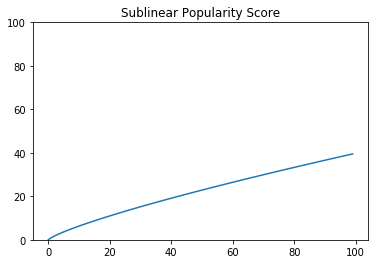

In [20]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 100, 1)
y = x ** 0.8
plt.plot(x, y)
plt.ylim(0, 100)
plt.title('Sublinear Popularity Score');

## Average Rating Ranking

- average item ratings is the easiest way to score items

### Challenges

- not always as simple as upvotes and downvotes, e.g. 5 star systems
- some items have very few ratings, i.e. confidence of average is low

### Using Confidence Intervals

$$95\% CI = (\bar{X} +- z_{score}\frac{s}{\sqrt{N}})$$

- as total number of ratings increases, estimated averaged approaches the expected rating
- compute the confidence interval for an item's rating and use the lower bound
- popularity will increase score by creating tighter confidence intervals, i.e. higher lower bounds

### Problems with Average Ratings

- 5 star ratings can leverage Wilson's interval
- we can convert each possible rating to a upvote and downvote percentage, e.g. 0 star is 1 downvote 0 upvote, 3 star is 0.5 downvote and 0.5 upvote, and 5 star is 0 downvotes and 1 upvote
- what if there are 0 ratings? We need to use smoothing to prevent divide by 0
- Laplace smoothing is common solution, also used in NLP
- this allows us to obtain smooth transition as number of voters increases


### Explore-Exploit Dilemma

- if you're at casino and there is row of slot machines, you can't tell which one is the best, you must play them to see which one has best rewards
- you need to calculate the win rate for each slot machine to determine which one to play (exploit)
- how many times should you play each slot machine (explore)?
  - if you play too few, your estimate will have large confidence interval
  - if you play too many, you are missing opportunity to explore other machines

- explore-exploit is faced when recommending items to users, and exploration is needed to encourage new, novel items
- exploring too much runs the risk of bad recommendations, but not exploring can be a bad user experience

## Bayesian Methods for the Explore-Exploit Challenge

AKA Bayesian Bandits

- we want to know the probability that a user will click on a recommendation
- can be applied to AB testing, Ad clicks, selecting stocks, etc
- we can draw recommendations from beta distributions and update these distributions with the customer feedback
- this allows for easy online learning

### Beta Distribution

A continuous probability distribution defined on [0,1] with 2 parameters, $\alpha$ and $\beta$.

$$\text{Beta PDF} = f(x;\alpha,\beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$

When $\alpha=1$ and $\beta=1$, the beta distribution is equivalent to uniform distribution.

### Bayes Theorem

$$p(H \mid D) = \frac{p(H)p(D\mid H)}{p(D)}$$
$$p(H \mid D) = posterior$$
$$p(H) = \text{prior, our belief before observing evidence}$$
$$p(D \mid H) = \text{likelihood of seeing evidence D if hypothesis H is correct}$$
$$p(D) = \text{likelihood of evidence under any circumstance, normalizing factor}$$

### Strategy

In the beginning, we don't have prior beliefs because we have not observed anything. So we start with $\alpha=1$ and $\beta=1$, i.e. all items have uniform, or equal probability.

1. Sample random variable from each of 3 asset's beta distributions.
2. Select the maximum random variable and show it to our user.
3. Determine feedback on item, e.g. user click.
4. Update the prior for selected item using feedback from (3).
5. Repeat.

### Posterior Over Time

Posteriors converge on expected value as we receive feedback from users.

![alt text](./images/bayesian-methods.png)

### Ranking with Bayesian Methods

- ranking scores is non-deterministic, we must sample from the posterior beta distributions
- by sampling, ranking is intelligently random
- this encourages *exploration*

### Bayesian Bandits Example Code

[See bayesian-bandits notebook](./bayesian-bandits-code.ipynb)

## Supervised Learning

### Demographic-Based Learners
- we can try to predict various targets using simple learning algorithms
    - did user buy product?
    - click on ad?
    - click on article?
    - sign up for newsletter?
    - make an accountt?
    - what rating did they give an item?
- common demographic features include
    - age, gender, religion, location, race, occupation
    - education level, marital status, socio-economic status
- other data from site
    - date/location of sign up
    - device type, mobile?
    - page views
    - credit card history
    - purchase history
- can purchase data
    - Acxiom
    - Intelius

### How to Incorporate Product Data

- above list includes only user features, how do we include product features?
- can create a separate model for each item, but will not scale to many products
- can add some product feature flags to the user feature vector and feed to model

### Latent Variable Models

- instead of explicit user features like age, gender, etc., we can learn implicit features
- these learnes features are not as interpretable, but they are mathematically optimal and yield better results
- this means we don't have to feature engineer features, saves time


## Page Rank

The Page Rank of a page is the probability that a user would end up on a page if they surfed the Internet randomly for an infinite amount of time.

Page Rank is just a score, and it can be applied to various recommender systems.

### Markov Models

- Markov Model finds $x_t$ given $x_{t-1}$
- [Visual explanations of MMs](https://setosa.io/ev/markov-chains/)

- similar to bigrams in NLP - building a probabilistic language model that allows prediction of next word given current word
    - what is probability of "cats" given "love" P(cats | love)
- bigrams only consider 2 words at a time, which is limited, and more advanced language models use DNN models with recurrent and attention layers
- instead of thinking about each item as a word, we think of it as a state $x(t)$
- $x(t)$ only depends on $x_{t-1}$

$$p(x_t \mid x_{t-1}, x_{t-2}, \dots, x_1) = p(x_t \mid x_{t-1})$$


- the **Transition* Probability Matrix A** defines the probability of transitioning from state *j* to state *i*
- valid probabilities - rows of the matrix must sum up to 1
- AKA as stochastic matrix or Markov matrix

$$A(i,j) = p(x_t = j \mid x_{t-1} = i)$$

- how to calculate probabilities in transition matrix?

$$p(rainy \mid sunny) = \frac{count(sunny \rightarrow rainy)}{count(sunny)}$$

- can use this method to calculate the probability of observing a sentence "the quick brown fox jumps over the lazy dog"

$$p(the)p(quick \mid the)p(brown \mid quick) \dots$$
$$p(x_1, \dots, x_T) = p(x_1) \prod_{t=2}^{T}{p(x_t \mid x_{t-1})}$$



- what if the test set contains a bigram that never occurs in the training data?
- this *zero* probability will produce a 0 probability due to multiplication
- therefore, we use add-1 smoothinng to prevent 0s in below equation, where V is equal to the total number of states

$$p(x_t \mid x_{t-1}) = \frac{count(i \rightarrow j) + 1}{count(i) + V}$$

- **state distribution** $\pi$ is the probability of being in a state at a given time
- Example: if there are 2 possible states, sunny and rainy, $\pi(t)$ will be a vector of size 2 $[p(x_t = sunny),p(x_t = rainy)]$
- we can calculate $\pi(t+1)$ using bayes rule, i.e. we can calculate the next state distribution

$$\pi_{t+1}(j) = \sum_{i=1}^M{A(i,j)\pi_t(i)}$$
$$\pi_{t+1} = \pi_tA$$

- we can predict the state *k* steps into the future

$$\pi_{t+k} = \pi_tA^k$$


- each web page on internet is modelled as a state in a Markov Model
- we model transition probability using links on a page

$$p(x_t = j \mid x_{t-1} = i) = \frac{1}{n(i)} \text{if i links to j, otw 0}$$

$$n(i) = # links on page i$$

- there are billions of web pages, so very sparse and mostly 0, so smoothing must be applied

## Evaluating Rankings

- goal is to return list of items sorted by predicted ranking
- how can we determine if our predicted ranking is good?
- a number of metrics exist, recall, precision, etc, but these are not always the best method because sometimes we need models to explore new items, e.g. novel/surprising items. Users don't always want more of the same
- no particular ranking can be "correct", we have to instead optimize metrics like revenue, impressions, clicks using A/B tests